#Modelling the spread of an epidemic: SIR models
##The SIR model describes the spread of an epidemic through a large population. It does this by describing the movement of the population through three phases of the disease: susceptible (S), infectious (I), and recovered (R). 

###This can be modeled as a system of differential equations.

In [16]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import odeint
import scikits.bvp_solver as bvp

###We first solve the following IVP on the interval [0, 100], and include a plot of results.
####S' = (-1/2)IS
####I' = (1/2)IS - (1/4)I
####R' = (1/4)I
####S(0) = 1 - 6.25*10e-7
####I(0) = 6.25*10e-7
####R(0) = 0

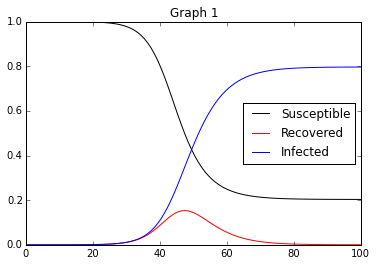

In [17]:
def ode(SIR_vec, t):
    return np.array([(-1./2)*SIR_vec[1]*SIR_vec[0], (1./2)*SIR_vec[1]*SIR_vec[0] - (1./4)*SIR_vec[1], (1./4)*SIR_vec[1]])

initial_vals = np.array([1 - 6.25*10e-7, 6.25*10e-7, 0.0])
t = np.linspace(0,100,100)

sol = odeint(ode, initial_vals, t)
S_vals, I_vals, R_vals = sol[:,0], sol[:,1], sol[:,2]

plt.plot(t, S_vals, color = "black", label = "Susceptible")
plt.plot(t, I_vals, color = "red", label = "Recovered")
plt.plot(t, R_vals, color = "blue", label = "Infected")
plt.legend(loc=5)
plt.title("Graph 1")
plt.show()

###In a city of 3 million, 5 have recently entered the city carrying a certain disease. Each of those individuals has a contact each day that could spread the disease, and an average of three days is spent in the infectious state. We model the situation in the city over the next 50 days, including two different scenarios.

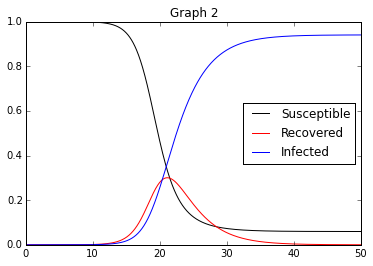

3 days: At the peak of the infection, 2098614.49838 people will be able to work.


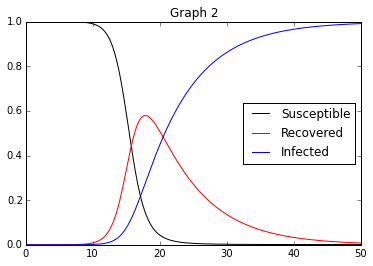

7 days: At the peak of the infection, 1262553.71482 people will be able to work.


In [18]:
N = 3000000.
infected = 5.
beta = 1./N
gamma = 1./3
days = np.linspace(0,50,1000)

def ode2(SIR_vec, t):
    return np.array([-beta*SIR_vec[1]*SIR_vec[0], beta*SIR_vec[1]*SIR_vec[0] - gamma*SIR_vec[1], gamma*SIR_vec[1]])

initial_vals2 = np.array([N-infected, infected, 0.0])

sol2 = odeint(ode2, initial_vals2, days)
S_vals2, I_vals2, R_vals2 = sol2[:,0]/N, sol2[:,1]/N, sol2[:,2]/N

plt.plot(days, S_vals2, color = "black", label = "Susceptible")
plt.plot(days, I_vals2, color = "red", label = "Recovered")
plt.plot(days, R_vals2, color = "blue", label = "Infected")
plt.title("Graph 2")
plt.legend(loc=5)
plt.show()

print "3 days: At the peak of the infection, " + str((S_vals2[np.argmax(I_vals2)] + R_vals2[np.argmax(I_vals2)])*3000000) + " people will be able to work."

gamma2 = 1./7

def ode2(SIR_vec, t):
    return np.array([-beta*SIR_vec[1]*SIR_vec[0], beta*SIR_vec[1]*SIR_vec[0] - gamma2*SIR_vec[1], gamma2*SIR_vec[1]])

initial_vals2 = np.array([N-infected, infected, 0.0])

sol2 = odeint(ode2, initial_vals2, days)
S_vals2, I_vals2, R_vals2 = sol2[:,0]/N, sol2[:,1]/N, sol2[:,2]/N

plt.plot(days, S_vals2, color = "black", label = "Susceptible")
plt.plot(days, I_vals2, color = "red", label = "Recovered")
plt.plot(days, R_vals2, color = "blue", label = "Infected")
plt.legend(loc=5)
plt.title("Graph 2")
plt.show()

print "7 days: At the peak of the infection, " + str((S_vals2[np.argmax(I_vals2)] + R_vals2[np.argmax(I_vals2)])*3000000) + " people will be able to work."

###In a city of approximately 3 million, 5 have recently entered carrying a certain disease. Each of those individuals will make 3 contacts every 10 days that could spread the disease, and an average of 4 days is spent in the infectious state. We model the situation in the city over the next 500 days.

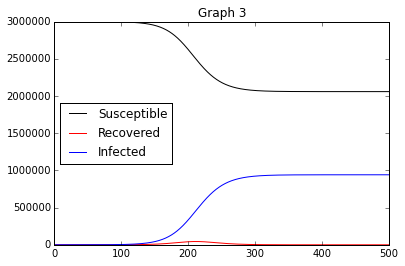

In [19]:
N = 3000000.
infected = 5.
beta = (3./10)/N
gamma = 1./4
days = np.linspace(0,500,1000)

def ode2(SIR_vec, t):
    return np.array([-beta*SIR_vec[1]*SIR_vec[0], beta*SIR_vec[1]*SIR_vec[0] - gamma*SIR_vec[1], gamma*SIR_vec[1]])

initial_vals2 = np.array([N-infected, infected, 0.0])

sol2 = odeint(ode2, initial_vals2, days)
S_vals2, I_vals2, R_vals2 = sol2[:,0], sol2[:,1], sol2[:,2]

plt.plot(days, S_vals2, color = "black", label = "Susceptible")
plt.plot(days, I_vals2, color = "red", label = "Recovered")
plt.plot(days, R_vals2, color = "blue", label = "Infected")
plt.legend(loc=6)
plt.title("Graph 3")
plt.show()

###SEIR models are another variation of the basic SIR model. Another compartment is added, called the 'exposed' or 'latency' phase, to the basic compartments susceptible, infectious, and recovered.

###In the following, we model a situation for measles over a one-year cycle. Boundary conditions are added that assume the beginning and ending states will be the same. This will require a system of 6 equations.

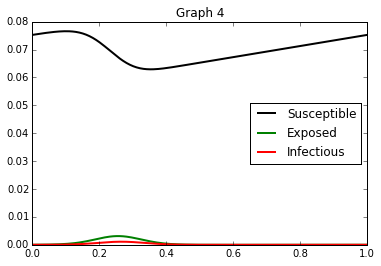

In [20]:
beta1 = 1
beta0 = 1575
eta = 0.01
lambda_val = .0279
mu = 0.02

def beta(t):
    return beta0*(1+beta1*np.cos(2*np.pi*t))

def ode3(x , y):
    return np.array([mu - beta(x)*y[0]*y[2] , beta(x)*y[0]*y[2] - y[1]/lambda_val, y[1]/lambda_val - y[2]/eta, 0., 0., 0.])

def bcs(ya, yb):
    BCa = ya[:3] - ya[3:] # 1 Boundary condition on the left
    BCb = yb[:3] - yb[3:] # 1 Boundary condition on the right
    return BCa, BCb
problem = bvp.ProblemDefinition(num_ODE=6,num_parameters=0,num_left_boundary_conditions=3,boundary_points=(0, 1),function=ode3,boundary_conditions=bcs)
solution = bvp.solve(problem, solution_guess=(.8, .1, .1, .8, .1, .1))
A = np.linspace(0, 1., 200)
T = solution(A)
plt.plot(A, T[0,:], "-k", linewidth=2., label = "Susceptible")
plt.plot(A, T[1,:], "g", linewidth=2., label= "Exposed")
plt.plot(A, T[2,:], "r", linewidth=2., label = "Infectious")
plt.legend(loc=5)
plt.title("Graph 4")
plt.show()